### Overview
This notebook post processed the log file (console log saved to a file) of the pre-train step, and extracted training losses from the log file

##### Training command:
python run_pretraining.py --input_file="gs://rayson84_bucket/data/pretrain/chatlogs_50mil_*_train" --output_dir="gs://rayson84_bucket/outputs" --albert_config_file="gs://rayson84_bucket/models/albert_config_50mil.json" --use_tpu=True --tpu_name=rayson84 --tpu_zone=us-central1-b --num_tpu_cores=8 --train_batch_size=512 --save_checkpoints_steps=1000 keep_checkpoint_max=3 --learning_rate=0.00022 --num_train_steps=1000000 --num_warmup_steps=25000 --max_seq_length=64 > out 2>error
###### logfiles


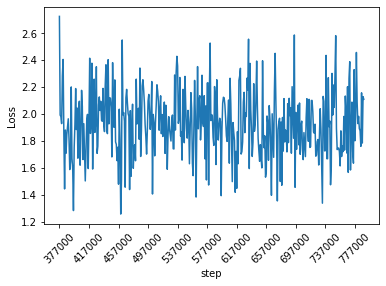

In [37]:
file_list = ["../logs/albert_pretrain_788000_20200127"]
import re
loss = []
step = []
for file in file_list:
    with open(file) as f:
        logs_raw = f.read()
    for logline in logs_raw.split("\n"):
        if "INFO:tensorflow:loss = " in logline:
            loss.append(float(logline[re.search(r"loss\s=\s", logline).end():re.search(r"\d,\sstep", logline).start()]))
            step.append(int(logline[re.search(r",\sstep\s=\s", logline).end():re.search(r",\sstep\s=\s\d+", logline).end()]))

import matplotlib.pyplot as plt 
import numpy as np
plt.plot(step, loss) 
plt.xticks(np.arange(step[0], step[-1], 40000), rotation=45)
plt.ylabel("Loss")
plt.xlabel("step")
plt.show()

##### Training command:
python run_pretraining.py --input_file="gs://rayson84_bucket/data/pretrain/chatlogs_50mil_*_train" --output_dir="gs://rayson84_bucket/outputs" --albert_config_file="gs://rayson84_bucket/models/albert_config_50mil.json" --use_tpu=True --tpu_name=rayson84 --tpu_zone=us-central1-b --num_tpu_cores=8 --train_batch_size=512 --save_checkpoints_steps=1000 keep_checkpoint_max=3 --learning_rate=0.00005 --num_train_steps=1000000 --num_warmup_steps=25000 --max_seq_length=64 > out 2>error
###### log files:
albert_pretrain_239000_20200128


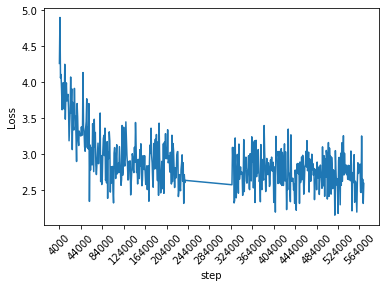

In [39]:
file_list = ["../logs/albert_pretrain_239000_20200128","../logs/albert_pretrain_364000_20200128","../logs/albert_pretrain_421000_20200128", "../logs/albert_pretrain_571000_20200129"]
import re
loss = []
step = []
for file in file_list:
    with open(file) as f:
        logs_raw = f.read()
    for logline in logs_raw.split("\n"):
        if "INFO:tensorflow:loss = " in logline:
            loss.append(float(logline[re.search(r"loss\s=\s", logline).end():re.search(r"\d,\sstep", logline).start()]))
            step.append(int(logline[re.search(r",\sstep\s=\s", logline).end():re.search(r",\sstep\s=\s\d+", logline).end()]))

import matplotlib.pyplot as plt 
import numpy as np
plt.plot(step, loss) 
plt.xticks(np.arange(step[0], step[-1], 40000), rotation=45)
plt.ylabel("Loss")
plt.xlabel("step")
plt.show()

In [41]:
loss[-5:]

[3.25328, 2.526911, 2.650045, 2.31418, 2.592518]